In [ ]:
#install the libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving newdata.csv to newdata (1).csv


In [ ]:

#store the data into data frame
df = pd.read_csv('newdata.csv')
df.head(10)


,Date,Prev Close,Close
0,11-05-2000,590.15,593.80
1,12-05-2000,593.80,570.15
2,15-05-2000,570.15,540.15
3,16-05-2000,540.15,515.90
4,17-05-2000,515.90,512.00
5,18-05-2000,512.00,510.70
6,19-05-2000,510.70,501.85
7,22-05-2000,501.85,499.05
8,23-05-2000,499.05,499.65
9,24-05-2000,499.65,501.75


In [ ]:
#get the number of trading days
df.shape

(364, 3)

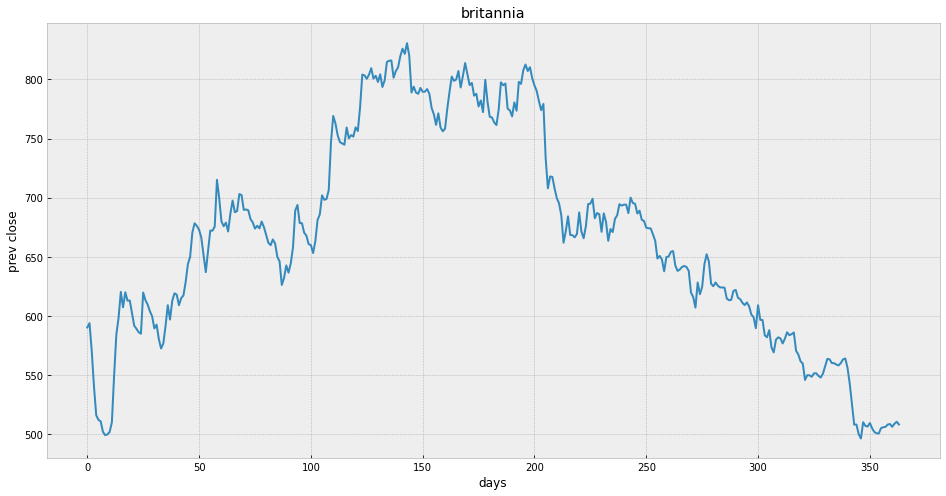

In [ ]:
#visualize the selling price data
plt.figure(figsize=(16,8))
plt.title('britannia')
plt.xlabel('days')
plt.ylabel('prev close')
plt.plot(df['Prev Close'])
plt.show()

In [ ]:
#get the prev close
df = df[['Prev Close']]
df.head(4)

,Prev Close
0,590.15
1,593.80
2,570.15
3,540.15


In [ ]:
#create a variable to predict 'x' days out into the future
future_days=25
#create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Prev Close']].shift(-future_days)
df.tail(4)

,Prev Close,Prediction
360,506.15,NaN
361,508.65,NaN
362,510.40,NaN
363,508.10,NaN


In [ ]:
#create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
x=np.array(df.drop(['Prediction'],1))[:-future_days]
print(x)

[[590.15]
 [593.8 ]
 [570.15]
 [540.15]
 [515.9 ]
 [512.  ]
 [510.7 ]
 [501.85]
 [499.05]
 [499.65]
 [501.75]
 [509.9 ]
 [549.55]
 [584.2 ]
 [598.4 ]
 [620.25]
 [607.15]
 [619.95]
 [612.8 ]
 [613.  ]
 [602.15]
 [591.6 ]
 [589.  ]
 [586.15]
 [584.9 ]
 [619.7 ]
 [613.2 ]
 [609.55]
 [603.95]
 [599.65]
 [589.35]
 [592.55]
 [580.35]
 [572.4 ]
 [576.55]
 [591.35]
 [609.  ]
 [596.85]
 [612.7 ]
 [619.05]
 [617.9 ]
 [609.  ]
 [614.95]
 [617.25]
 [628.65]
 [643.75]
 [649.95]
 [670.55]
 [678.3 ]
 [676.1 ]
 [672.9 ]
 [666.05]
 [651.65]
 [637.  ]
 [654.85]
 [672.15]
 [672.05]
 [675.5 ]
 [715.05]
 [699.55]
 [679.95]
 [675.8 ]
 [678.85]
 [671.35]
 [686.45]
 [697.55]
 [687.65]
 [688.6 ]
 [703.05]
 [702.15]
 [689.6 ]
 [690.  ]
 [689.3 ]
 [681.9 ]
 [679.05]
 [673.8 ]
 [676.2 ]
 [674.  ]
 [679.75]
 [675.05]
 [668.5 ]
 [661.8 ]
 [659.8 ]
 [664.6 ]
 [661.2 ]
 [649.9 ]
 [646.05]
 [626.1 ]
 [632.1 ]
 [642.65]
 [636.5 ]
 [644.3 ]
 [657.85]
 [689.  ]
 [693.8 ]
 [678.5 ]
 [678.4 ]
 [670.35]
 [667.8 ]
 [660.7 ]


In [ ]:
#createthe target data set (y)and convert it to a numpy array and get all of the target values except thelast 'x' rows/days
y=np.array(df['Prediction'])[:-future_days]
print(y)

[619.7  613.2  609.55 603.95 599.65 589.35 592.55 580.35 572.4  576.55
 591.35 609.   596.85 612.7  619.05 617.9  609.   614.95 617.25 628.65
 643.75 649.95 670.55 678.3  676.1  672.9  666.05 651.65 637.   654.85
 672.15 672.05 675.5  715.05 699.55 679.95 675.8  678.85 671.35 686.45
 697.55 687.65 688.6  703.05 702.15 689.6  690.   689.3  681.9  679.05
 673.8  676.2  674.   679.75 675.05 668.5  661.8  659.8  664.6  661.2
 649.9  646.05 626.1  632.1  642.65 636.5  644.3  657.85 689.   693.8
 678.5  678.4  670.35 667.8  660.7  659.85 653.1  663.15 681.15 685.85
 701.9  698.15 698.85 706.45 747.1  769.1  762.7  752.7  746.95 745.8
 744.75 759.3  750.15 752.9  751.65 759.45 756.35 776.35 804.1  803.4
 800.5  804.05 809.5  800.75 803.1  797.85 804.3  793.6  799.15 814.75
 815.8  816.   801.45 807.1  810.25 819.65 826.   821.6  830.65 820.1
 788.9  793.85 788.95 787.8  792.8  789.55 789.6  791.85 787.75 775.9
 770.5  761.55 771.35 759.35 756.1  758.25 775.05 789.4  802.4  798.75
 799.95 807.

In [ ]:
#split  the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


In [ ]:
#create models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train,y_train)

In [ ]:
#get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[583.65],
       [584.5 ],
       [585.9 ],
       [570.45],
       [567.3 ],
       [561.6 ],
       [559.6 ],
       [545.75],
       [549.8 ],
       [549.7 ],
       [548.45],
       [551.3 ],
       [551.45],
       [549.25],
       [547.8 ],
       [551.  ],
       [557.15],
       [563.6 ],
       [563.2 ],
       [560.05],
       [559.95],
       [558.8 ],
       [558.05],
       [560.  ],
       [563.15]])

In [ ]:
#show the model tree prediction
tree_prediciton = tree.predict(x_future)
print(tree_prediciton)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[563.95 612.7  542.7  525.   563.2  508.05 508.45 500.65 506.9  506.9
 506.35 509.35 509.35 501.75 500.65 500.45 505.   505.75 508.1  508.05
 508.45 506.15 506.15 510.4  508.1 ]

[595.99849546 596.69845795 597.85133735 585.12848971 582.53451106
 577.84064494 576.19367437 564.78840318 568.12351858 568.04117005
 567.01181345 569.35874651 569.4822693  567.67060167 566.47654801
 569.11170092 574.17613542 579.48761551 579.15822139 576.56424275
 576.48189422 575.53488614 574.91727218 576.52306848 579.11704713]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


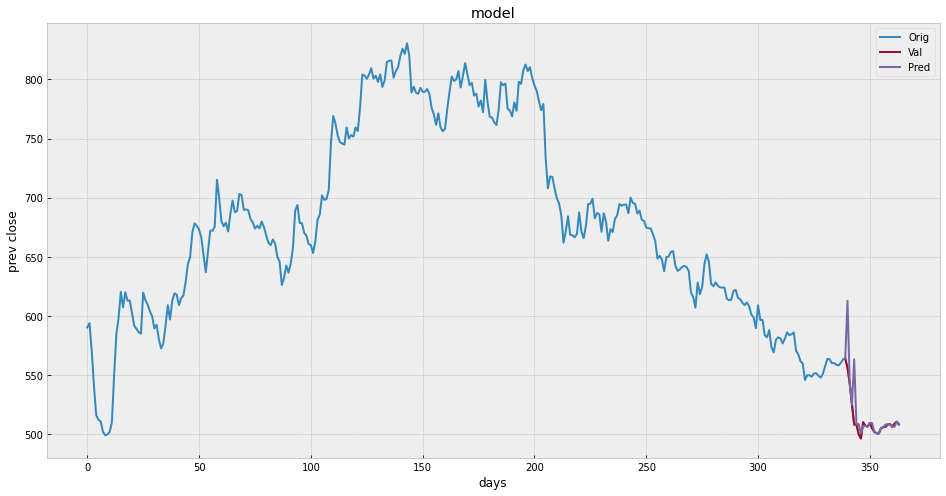

In [ ]:
#visualize the data
prediction = tree_prediciton

valid= df[x.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('days')
plt.ylabel('prev close')
plt.plot(df['Prev Close'])
plt.plot(valid[['Prev Close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
accuracy = regressor.score(x_test,y_test)
print(accuracy*100,'%')

62.831857229766555 %


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import prediction_error


In [ ]:
# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


NameError: ignored